In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

aapl=web.DataReader('AAPL', 'yahoo')
goog=web.DataReader('GOOG', 'yahoo')
baba=web.DataReader('BABA', 'yahoo')
amzn=web.DataReader('AMZN', 'yahoo')

D:\Programing\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


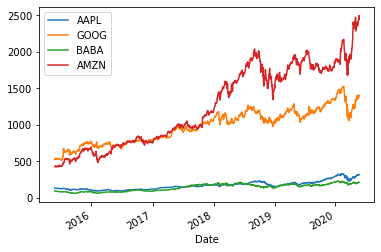

In [2]:
aapl_close=aapl['Close']
goog_close=goog['Close']
baba_close=baba['Close']
amzn_close=amzn['Close']

stock=pd.DataFrame({
    'AAPL': aapl_close,
    'GOOG': goog_close,
    'BABA': baba_close,
    'AMZN': amzn_close
})
stock.plot()

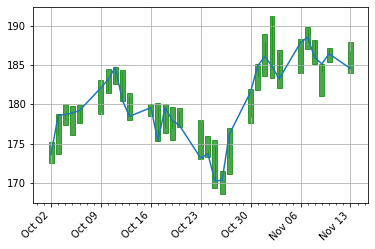

In [6]:
from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator, MONDAY
from mpl_finance import candlestick_ochl
import matplotlib.dates as mdates
import datetime

start=datetime.datetime(2017, 10, 1)
end=datetime.datetime(2017, 11, 13)
baba_se=baba.loc[start: end]

mondays=WeekdayLocator(MONDAY)
alldays=DayLocator()
week_formatter=DateFormatter('%b %d')

fig, ax=plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(week_formatter)

baba_ohlc=baba_se.reset_index()
baba_ohlc['Date']=baba_ohlc['Date'].map(mdates.date2num)
candlestick_ochl(ax, baba_ohlc.values, width=0.7, colorup='r', colordown='g', alpha=0.7)

ax.plot(baba_se['Close'])

ax.xaxis_date()
ax.autoscale_view()
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.grid(True)

In [8]:
# 相对变化
baba_return=baba.apply(lambda x: x/ x[0])
baba_return.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-05-26,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2015-05-27,0.990098,1.000546,0.984730,1.000865,0.607296,1.000865
2015-05-28,0.978812,0.989405,0.979071,0.983031,0.906736,0.983031
2015-05-29,0.974233,0.975642,0.975440,0.965413,0.886334,0.965413
2015-06-01,0.968803,0.977499,0.961986,0.981193,0.631959,0.981193


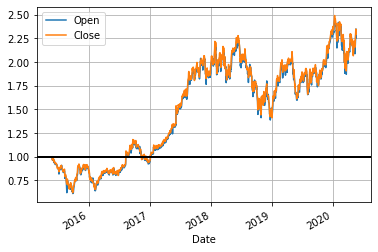

In [9]:
baba_return[['Open', 'Close']].plot(grid=True).axhline(y=1, color='black', lw=2)

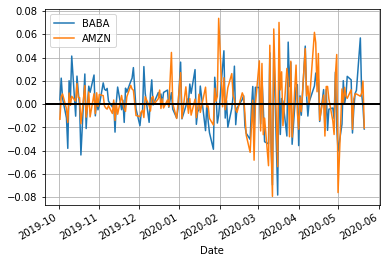

In [10]:
import datetime

baba_close_change=baba['Close'].loc[datetime.datetime(2019,10,1):].pct_change()
amzn_close_change=amzn['Close'].loc[datetime.datetime(2019,10,1):].pct_change()

df=pd.DataFrame({
    'BABA': baba_close_change,
    'AMZN': amzn_close_change
})
df.plot(grid=True).axhline(y=0, color='black', lw=2)

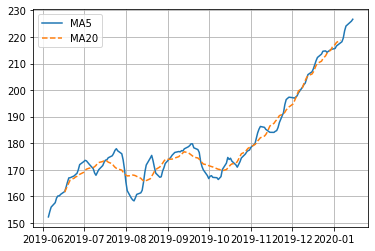

In [12]:
# 移动平均线
import numpy as np

baba_train=baba[datetime.datetime(2019,6,1): datetime.datetime(2020,1,20)]
baba_train_close=baba_train['Close']

ma20_mean=np.round(baba_train_close.rolling(window=20, center=True).mean(),2)
ma5_mean=np.round(baba_train_close.rolling(window=5, center=True).mean(), 2)

fig, ax=plt.subplots()
ax.plot(ma5_mean, label='MA5', linestyle='-')
ax.plot(ma20_mean, label='MA20', linestyle='--')
plt.legend()
plt.grid(True)

In [13]:
baba_diff=ma5_mean-ma20_mean
signal=np.sign(baba_diff-baba_diff.shift(1))
buy=pd.DataFrame({
    'price': baba_train.loc[signal.values==1, 'Close'],
    'operation': 'Buy'
})
sell=pd.DataFrame({
    'price': baba_train.loc[signal.values==-1, 'Close'],
    'operation': 'Sell'
})
trade=pd.concat([buy, sell])
trade.sort_index(inplace=True)
trade


D:\Programing\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sign
  result = getattr(ufunc, method)(*inputs, **kwargs)


,price,operation
Date,,
2019-06-18,165.509995,Buy
2019-06-19,165.460007,Buy
2019-06-20,168.250000,Buy
2019-06-21,167.550003,Sell
2019-06-24,168.100006,Buy
...,...,...
2019-12-30,212.910004,Sell
2019-12-31,212.100006,Sell
2020-01-02,219.770004,Sell
